In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x) #suppresses scientific notation
from sklearn.metrics import mean_squared_error

### Model 1: Multivariate Linear Regression, using variables identified in Variable Selection file

In [2]:
#Data Preprocessing
all_data = pd.read_csv("AttyFeeStudy2007.csv")
data_for_regression = all_data[["Sales", "XDaysIn", "XnumEmplBefore", "AssetsScheduled", "FeeExpOrd"]]
data_for_regression.at[23, "Sales"] =  100789000000
data_for_regression = data_for_regression.astype(float)
X = data_for_regression.iloc[:, :-1].values
y = data_for_regression.iloc[:, 4].values

In [6]:
#Preview of dataset (without preprocessing)
all_data.head()

,XNameCorp,DateFiled,DateConfirmed,YearConfirmed,AssetsScheduled,LiabScheduled,AssetLiab,CaseNumber,XDistFiled,XCityFiled,...,DipLeadFa,CcLeadAttyFeeExpOrd,CcLeadAtty,CcLeadFaFeeExpOrd,CcLeadFa,ParaHours,ProfHours,RoleDipAcctMisc,DipAcctMiscFeeOrd,DipAcctMiscFeeExpOrd
0,aaiPharma Inc.,5/10/05,1/20/06,2006,323.323,446.693,385.008,05-11341,DE,Wilmington,...,Chanin,694465.000,ReedSmith,572487.000,JHCohn,nan,nan,1,430763,432428
1,Adelphia Communications Corp.,6/25/02,1/5/07,2007,24409.000,18605.000,21507.000,02-41729,NY SD,New York,...,LazardFreres,54171054.000,KasowitzBenson,14587277.000,Greenhill,nan,nan,19,187601152,198026448
2,Alliance Entertainment Corp.,7/14/97,7/30/98,1998,512.000,523.300,517.650,97-44673,NY SD,New York,...,ZolfoCooper,1161191.000,SchulteRoth,1002034.000,Chanin,nan,nan,3,650550,662615
3,"Allied Holdings, Inc.",7/31/05,5/18/07,2007,132.226,179.895,156.060,05-12515,GA ND,Newnan,...,MillerBuckfire,4040310.000,BinghamMcCutchen,2965894.000,CapitalPartners,nan,nan,5,6197890,6236788
4,American Banknote Corporation,12/8/99,8/22/02,2002,207.785,188.000,197.893,99-11577,NY SD,New York,...,NaN,158585.000,AndrewsKurth,nan,NaN,nan,nan,0,0,0


In [7]:
#Preview of dataset (solely numerical values). Note: FeeExpOrd represents cost of bankruptcy (awarded by court)
data_for_regression.head()

,Sales,XDaysIn,XnumEmplBefore,AssetsScheduled,FeeExpOrd
0,215330000.000,255.000,924.000,323.323,8757074.000
1,2909000000.000,1655.000,15735.000,24409.000,490405854.000
2,691100000.000,381.000,1850.000,512.000,10440169.000
3,895213000.000,656.000,6400.000,132.226,29032452.000
4,336000000.000,988.000,3390.000,207.785,2230531.000


In [3]:
#Splitting into train and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Fit regressor to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#Predicting results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [9]:
#Comparing actual values to predicted values
results = pd.DataFrame()
results["Actual"] = y_test
results["Predictions"] = y_pred
results

,Actual,Predictions
0,22893851.000,4214842.703
1,4867603.000,10440765.766
2,10440169.000,14142534.737
3,23436879.000,49627993.141
4,3636415.000,-13878218.066
5,23266061.000,46017591.118
6,88779884.000,278265520.406
7,9381225.000,6089875.795
8,12037684.000,18727381.466
9,6253206.000,-8651641.461


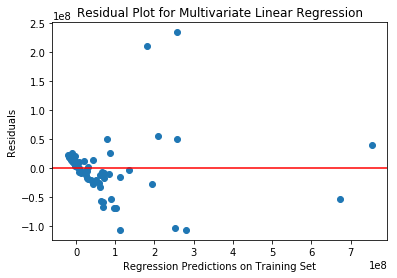

In [19]:
#Residual plot shows clear curved pattern, implying that our linear model may not be best fit
residuals = y_train - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.title("Residual Plot for Multivariate Linear Regression")
plt.xlabel("Regression Predictions on Training Set")
plt.ylabel("Residuals")
plt.axhline(y=0, color = 'r')

In [12]:
rmse = (mean_squared_error(y_test, y_pred))**(1/2)
print("Root mean squared error for multivariate linear regression: " + str(rmse))

Root mean squared error for multivariate linear regression: 45566710.84680846


### Model 2: Lasso

In [17]:
#Preprocessing for lasso
data_for_lasso = all_data[["AssetsScheduled", "XnumEmplBefore", 
                           "Sales", "XShop", "XDaysIn", "DENYOther", "XPrepackaged",
                           "FeeCommi", "Role", "FeeExpOrd"]]
data_for_lasso.at[23, "Sales"] =  100789000000
X_lasso = data_for_lasso.iloc[: , 0:9]
y_lasso = data_for_lasso["FeeExpOrd"]

#Encoding categorical variables

#Encoding categorical data: XShop
def encode_XShop(array):
    vals = []
    for x in array:
        if x == "Yes":
            vals.append(1)
        else:
            vals.append(0)
    return np.array(vals)

encoded_XShop = encode_XShop(X_lasso["XShop"])
X_lasso["Encoded_XShop"] = encoded_XShop

#Encoding categorical data: DENYOther, Other will be excluded (default)
def encode_DENYOther(array):
    DE_vals = []
    NY_vals = []
    for x in array:
        if x == "DE":
            DE_vals.append(1)
            NY_vals.append(0)
        elif x == "NY":
            DE_vals.append(0)
            NY_vals.append(1)
        else:
            DE_vals.append(0)
            NY_vals.append(0)
    return np.array(DE_vals), np.array(NY_vals)

encoded_DE = encode_DENYOther(X_lasso["DENYOther"])[0]
encoded_NY = encode_DENYOther(X_lasso["DENYOther"])[1]
X_lasso["Encoded_DE"] = encoded_DE 
X_lasso["Encoded_NY"] = encoded_NY

#Encoding categorical data: XPrepackaged, no will be excluded (default)
def encode_XPrepackaged(array):
    yes_vals = []
    preneg_vals = []
    for x in array:
        if x == "yes":
            yes_vals.append(1)
            preneg_vals.append(0)
        elif x == "prenegotiated":
            yes_vals.append(0)
            preneg_vals.append(1)
        else:
            yes_vals.append(0)
            preneg_vals.append(0)
    return np.array(yes_vals), np.array(preneg_vals)

encoded_yes = encode_XPrepackaged(X_lasso["XPrepackaged"])[0]
encoded_preneg = encode_XPrepackaged(X_lasso["XPrepackaged"])[1]
X_lasso["Encoded_Prepackaged_yes"] = encoded_yes
X_lasso["Encoded_Prepackaged_prenegotiated"] = encoded_preneg

#Encoding categorical data: FeeCommi, no will be excluded (default)
def encode_FeeCommi(array):
    yes_vals = []
    for x in array:
        if x == "yes":
            yes_vals.append(1)
        else:
            yes_vals.append(0)
    return np.array(yes_vals)
encoded_FeeCommi = encode_FeeCommi(X_lasso["FeeCommi"])
X_lasso["Encoded_FeeCommi"] = encoded_FeeCommi

X_lasso = X_lasso.drop(["XShop", "DENYOther", "XPrepackaged", "FeeCommi"], axis = 1)

In [18]:
#Preview of newly encoded independent variables
X_lasso.head()

,AssetsScheduled,XnumEmplBefore,Sales,XDaysIn,Role,Encoded_XShop,Encoded_DE,Encoded_NY,Encoded_Prepackaged_yes,Encoded_Prepackaged_prenegotiated,Encoded_FeeCommi
0,323.323,924,215330000,255,10,1,1,0,0,0,0
1,24409.000,15735,2909000000,1655,49,1,0,1,0,0,1
2,512.000,1850,691100000,381,13,0,0,1,0,0,0
3,132.226,6400,895213000,656,19,1,0,0,0,0,0
4,207.785,3390,336000000,988,7,0,0,1,0,1,0


In [20]:
#Splitting lasso data into train and test set
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size = 0.3, random_state = 0)

In [21]:
#Fit regressor to training set
from sklearn.linear_model import LassoCV
lasso_regressor = LassoCV()
lasso_regressor.fit(X_train_lasso, y_train_lasso)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [22]:
#Predicting values
y_pred_lasso = lasso_regressor.predict(X_test_lasso)
y_pred_train_lasso = lasso_regressor.predict(X_train_lasso)

In [23]:
#Comparing actual values to predicted values
results_lasso = pd.DataFrame()
results_lasso["Actual"] = y_test_lasso
results_lasso["Predictions"] = y_pred_lasso
results_lasso

,Actual,Predictions
26,22893851,29910479.646
92,4867603,41873904.550
2,10440169,35110731.710
55,23436879,30828955.180
91,3636415,30165113.858
84,23266061,57391118.867
16,88779884,98235232.853
66,9381225,31156305.549
54,12037684,46434332.731
68,6253206,30851032.159


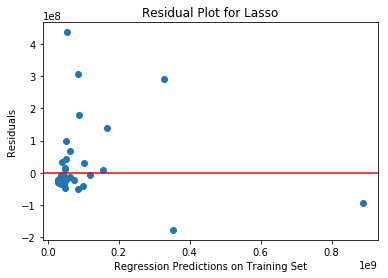

In [26]:
#Residual plot shows less a curved pattern: A good step toward a better model
residuals_lasso = y_train_lasso - y_pred_train_lasso
plt.scatter(y_pred_train_lasso, residuals_lasso)
plt.title("Residual Plot for Lasso")
plt.xlabel("Regression Predictions on Training Set")
plt.ylabel("Residuals")
plt.axhline(y=0, color = 'r')

In [25]:
rmse_lasso = (mean_squared_error(y_test_lasso, y_pred_lasso))**(1/2)
print("Root mean squared error for lasso: " + str(rmse_lasso))

Root mean squared error for lasso: 44948465.98221826


### Model 3: Gradient Boosted Trees

In [17]:
#Attempt with gradient boosted trees, using lasso training/test sets

from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train_lasso, y_train_lasso)
rmse = (mean_squared_error(y_test_lasso, clf.predict(X_test_lasso)))**(1/2)
print("MSE: %.4f" % rmse)


MSE: 37122616.9427


In [28]:
#Fitting Model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBT_model = ensemble.GradientBoostingRegressor(**params)
GBT_model.fit(X_train_lasso, y_train_lasso)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [29]:
#Predicting values
y_pred_GBT = GBT_model.predict(X_test_lasso)
y_pred_train_GBT = GBT_model.predict(X_train_lasso)

In [30]:
#Comparing actual values to predicted values
results_GBT = pd.DataFrame()
results_GBT["Actual"] = y_test_lasso
results_GBT["Predictions"] = y_pred_GBT
results_GBT

,Actual,Predictions
26,22893851,28631110.287
92,4867603,12482176.549
2,10440169,10584129.123
55,23436879,33366519.547
91,3636415,6296563.451
84,23266061,55701147.061
16,88779884,252559478.779
66,9381225,7726902.008
54,12037684,13625882.779
68,6253206,5807510.156


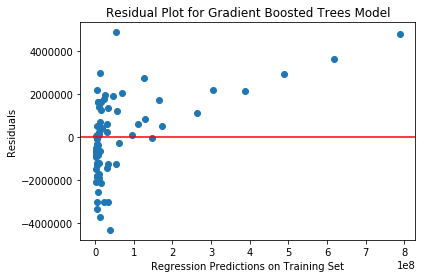

In [31]:
#Interesting upward linear pattern for progressively larger values, high variance in reisudals around lower values
residuals_GBT = y_train_lasso - y_pred_train_GBT
plt.scatter(y_pred_train_GBT, residuals_GBT)
plt.title("Residual Plot for Gradient Boosted Trees Model")
plt.xlabel("Regression Predictions on Training Set")
plt.ylabel("Residuals")
plt.axhline(y=0, color = 'r')

In [37]:
rmse_GBT = (mean_squared_error(y_test_lasso, y_pred_GBT))**(1/2)
print("Root mean squared error for gradient boosted trees: " + str(rmse_GBT))

Root mean squared error for gradient boosted trees: 37756308.86675579
